# Chapter 16: How to build a process behavior chart

For additional context see chapter 16 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [2]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Step 1: Gather the data

Gathering data is an often overlooked but quintessential step in building a process behavior chart. While here the effort of gathering the data is reduced to the retrieving the data from a GitHub repository, in the real world the effort to gather data is more nuanced. As articulated by Donald J. Wheeler on page 13 *Understanding Variation: The Key to Managing Chaos*, **"No data have meaning apart from their context".** Gathering data in the real world is an opporutnity to establish this context. 

In [3]:
# Establish the dataset_url
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/16-vienna-general-monthly-births-deaths-1841-to-1849-data.csv'

# Get data function
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data(dataset_url)
df.head()

,MonthYear,Year,Month,Births,Deaths
0,January 1841,1841,January,254.0,37.0
1,February 1841,1841,February,239.0,18.0
2,March 1841,1841,March,277.0,12.0
3,April 1841,1841,April,255.0,4.0
4,May 1841,1841,May,255.0,2.0


### Calculate the death-to-birth ratio for each month

In [4]:
# Add Death-to-Birth Ratio column
df['Death-to-Birth Ratio'] = round((df['Deaths']/df['Births'])*100,1)
df.head()

,MonthYear,Year,Month,Births,Deaths,Death-to-Birth Ratio
0,January 1841,1841,January,254.0,37.0,14.6
1,February 1841,1841,February,239.0,18.0,7.5
2,March 1841,1841,March,277.0,12.0,4.3
3,April 1841,1841,April,255.0,4.0,1.6
4,May 1841,1841,May,255.0,2.0,0.8


### Add a ShortMonthYear column

In [5]:
# Add column called ShortMonthYear that shows a short version of months with the year
df['ShortMonthYear'] = df['Month'].apply(lambda x: x[0:3]) + '-' + df['Year'].apply(lambda x: str(x)[-2:]).astype('string')
df.head()

,MonthYear,Year,Month,Births,Deaths,Death-to-Birth Ratio,ShortMonthYear
0,January 1841,1841,January,254.0,37.0,14.6,Jan-41
1,February 1841,1841,February,239.0,18.0,7.5,Feb-41
2,March 1841,1841,March,277.0,12.0,4.3,Mar-41
3,April 1841,1841,April,255.0,4.0,1.6,Apr-41
4,May 1841,1841,May,255.0,2.0,0.8,May-41


## Step 2: Calculate the moving ranges

Calculating the moving ranges is the process of calculating **the absolute value of the difference between subsequent values in a dataset.** Put more simply, calculating the moving ranges is the process of calcuating the differences between subsequent values in a dataset and ignoring the sign.

If the first value in a dataset is 1 and the second value in a dataset is 3, the associated moving range is 2. If the second value in a dataset is 3 and the third value in a dataset is 3, the associated moving range is zero.

In [6]:
# Calculate the moving ranges and add them to the DataFrame as the "Moving Range" column
df['Moving Ranges'] = abs(df['Death-to-Birth Ratio'].diff())
df.head()

,MonthYear,Year,Month,Births,Deaths,Death-to-Birth Ratio,ShortMonthYear,Moving Ranges
0,January 1841,1841,January,254.0,37.0,14.6,Jan-41,NaN
1,February 1841,1841,February,239.0,18.0,7.5,Feb-41,7.1
2,March 1841,1841,March,277.0,12.0,4.3,Mar-41,3.2
3,April 1841,1841,April,255.0,4.0,1.6,Apr-41,2.7
4,May 1841,1841,May,255.0,2.0,0.8,May-41,0.8


## Step 3: Calculate the average moving range

The average moving range is the average of the moving ranges. Its calculation is necessary for building a process behavior chart because of its role in the process limit formulas.

To calculate the average moving range, sum all of the values in the moving range column and divide by the number of values in the column.

In [7]:
# Calculate the average moving range
average_mR = round(df['Moving Ranges'].mean(),2)
print('Average moving range:',average_mR)

Average moving range: 3.79


## Calculate the mean

The mean, like the average moving range, plays an important role in the calculation of process limits. To calculate the mean, sum all of the values in the Death-to-Birth Ratio column and divide by the number of values.

In [8]:
# Calculate the mean
mean = round(df['Death-to-Birth Ratio'].mean(),2)
print('Mean:',mean)

Mean: 8.62


## Step 5: Calculate the process limits

The process limits are the defining features of a process behavior chart. It is through the use of process limits that we are able to discirmiante common causes of routine variation from assignable causese of exceptional variation. 

Given that the death-to-birth ratio data used here is composed of individual values and a moving range, the process limits will be calculated using the bias correction factors of **C1** and **C2** with respective values of **2.660** and **3.268**.

The formulas for the Upper Process Limit (UPL), Lower Process Limit (LPL), and Upper Range Limit (URL) are:

**<center> UPL = Mean + (C1*Average Moving Range) <center>**

**<center> LPL = Mean + (C1*Average Moving Range) <center>**

**<center> URL = (C2*Average Moving Range) <center>**

In [9]:
# Set values for the numeric constants C1 and C2
C1 = 2.660
C2 = 3.268

# Calculate the Upper Range Limit
UPL = round(mean + (C1*average_mR),2)
# Calculate the Lower Process Limit
LPL = round(max(0, mean - (C1*average_mR)),2) # Note the max condition 
# Calculate the Upper Range Limit
URL = round(C2*average_mR,2)

# Show the results 
print('UPL:',UPL, 'LPL:',LPL,'URL:',URL)

UPL: 18.7 LPL: 0 URL: 12.39


Note that while the calculated value of the Lower Process Limit is -1.46, the reported value of the Lower Process Limit is zero (0). The reported value is zero because it is impossible to have a negative death-to-birth ratio. To account for this, the calculation of the Lower Process Limit is wrapped in a `max()` function. This function returns the largest (maximum) value from the provided arguments. 

## Step 6: Put it all together!

Putting it all together is the culmination of the prior steps. It is where we actually build the process behavior chart.

In [10]:
# Round setting
round_value = 2

# Extract Data
data = df['Death-to-Birth Ratio']
labels = df['ShortMonthYear']
moving_ranges = df['Moving Ranges']

# Define Process Limits
xchart_lines = [(mean, 'black'), (UPL, 'red'), (LPL, 'red')]
mrchart_lines = [(average_mR, 'black'), (URL, 'red')]

# Mask values outside limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)

### First create a time series

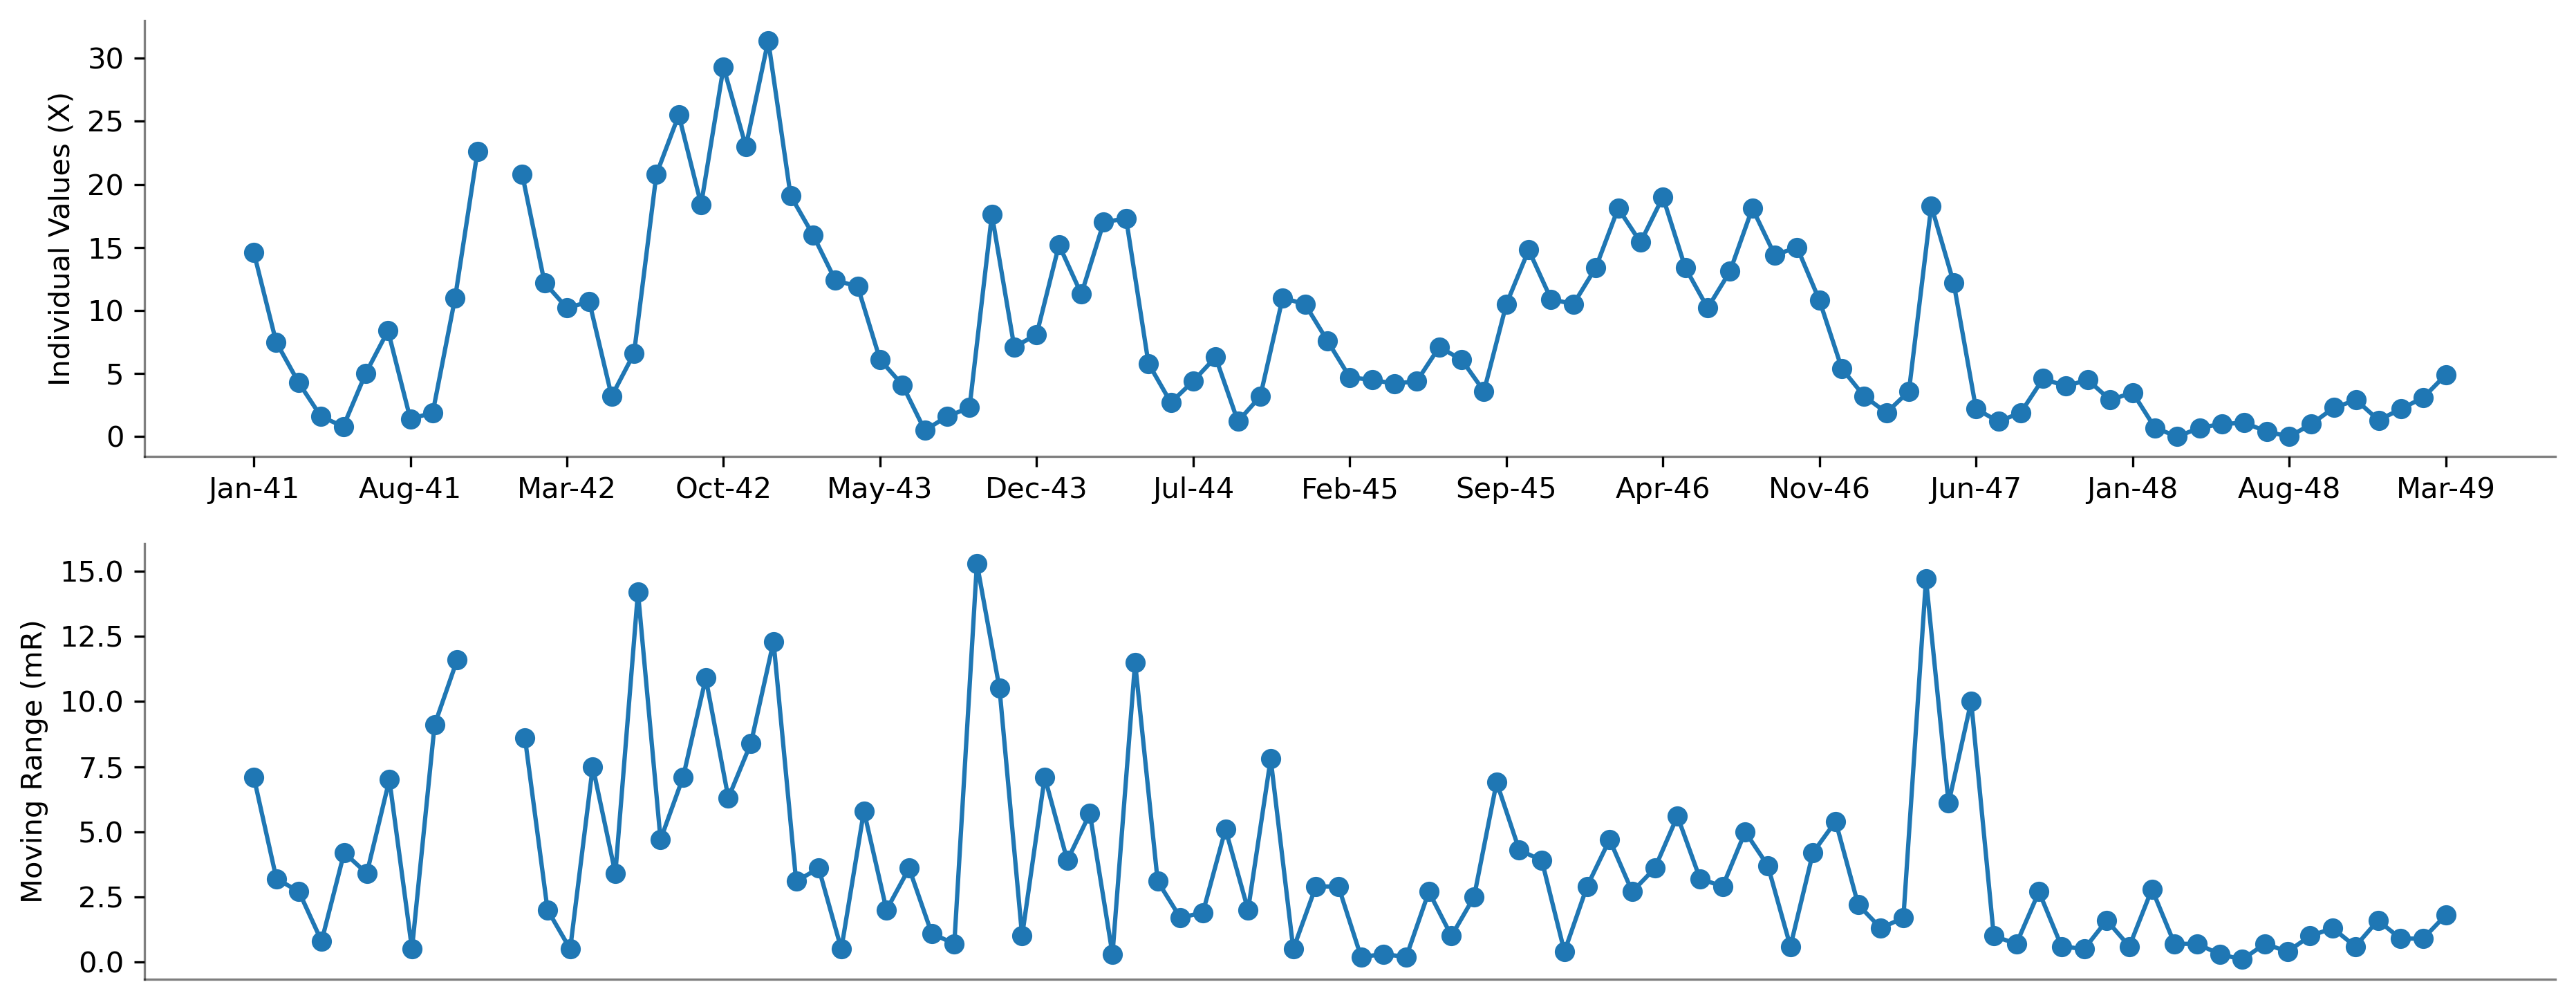

In [11]:
# Create figure and axs
fig, axs = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, dpi=300)

# X-Chart (Individuals Chart)
axs[0].plot(labels, data, marker='o', label="Data")

# X-Axis Formatting
tick_interval = 7
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center')

# Moving Range Chart (mR Chart)
axs[1].plot(labels, moving_ranges, marker='o', label="Moving Range")

# Titles and Labels
axs[0].set_ylabel("Individual Values (X)")
axs[0].set_xlabel("")
axs[0].set_title("")

# Remove xticks on moving range chart
axs[1].set_xticks([])
axs[1].set_ylabel("Moving Range (mR)")

# Remove spines
sns.despine()

# Set alpha values
for val in range(0,2):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Show Plot
plt.show()

### Create the process behavior chart

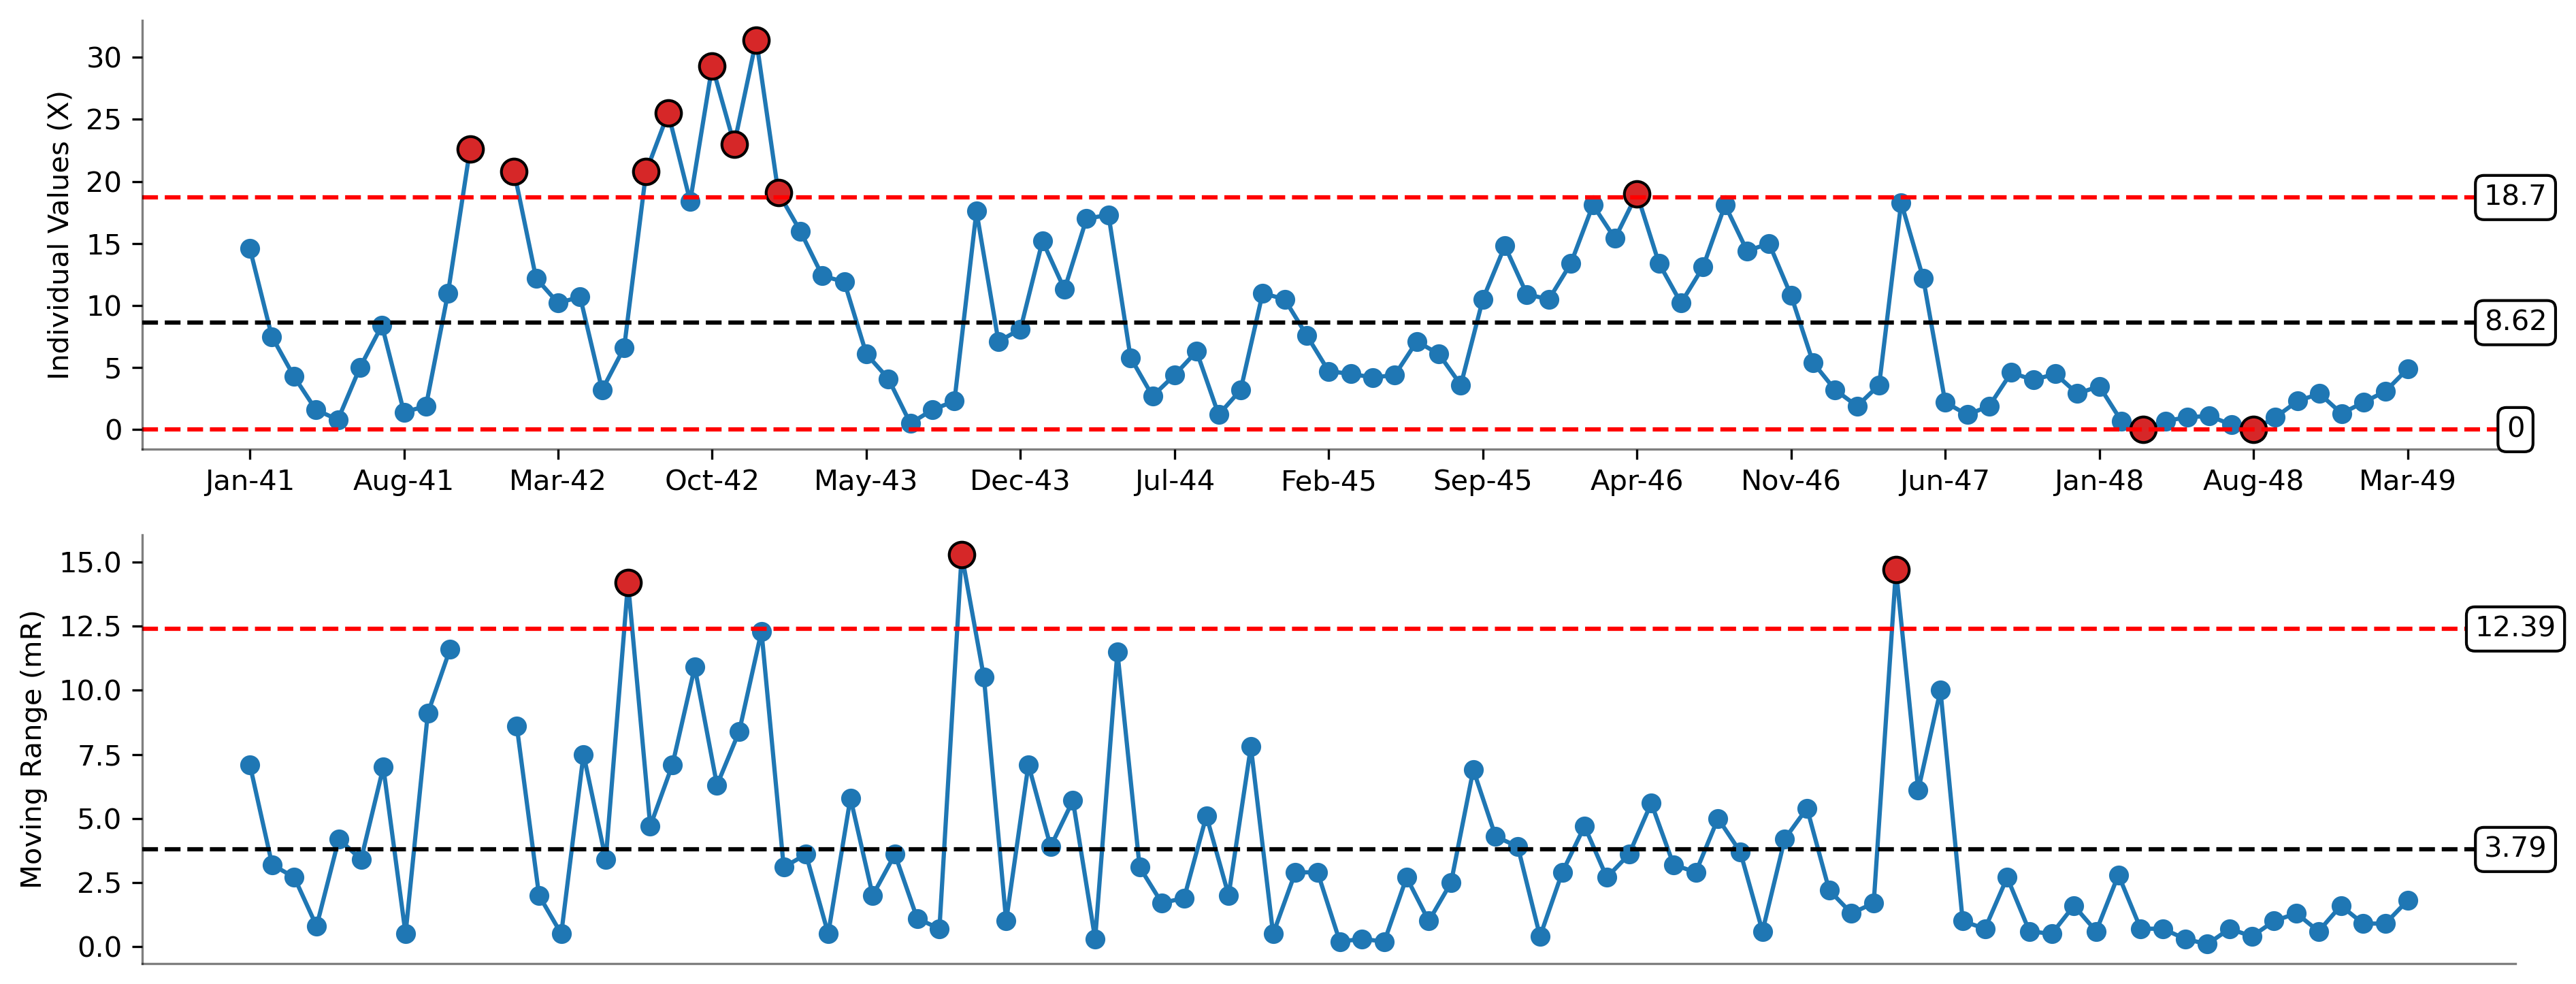

In [12]:
# Create figure and axs
fig, axs = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, dpi=300)

# X-Chart (Individuals Chart)
axs[0].plot(labels, data, marker='o', label="Data")
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in xchart_lines:
    axs[0].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
for value, label in [(UPL, UPL), (LPL, LPL), (mean, mean)]:
    axs[0].text(axs[0].get_xlim()[1] * 1.0, value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# X-Axis Formatting
tick_interval = 7
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center')

# Moving Range Chart (mR Chart)
axs[1].plot(labels, moving_ranges, marker='o', label="Moving Range")
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in mrchart_lines:
    axs[1].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
for value, label in [(URL, URL), (average_mR, average_mR)]:
    axs[1].text(axs[1].get_xlim()[1] * 1.0, value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# Titles and Labels
axs[0].set_ylabel("Individual Values (X)")
axs[0].set_xlabel("")
axs[0].set_title("")

# Remove xticks on moving range chart
axs[1].set_xticks([])
axs[1].set_ylabel("Moving Range (mR)")

# Remove spines
sns.despine()
# Set alpha values
for val in range(0,2):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Show Plot
plt.show()

### Generate process behavior chart with anotation

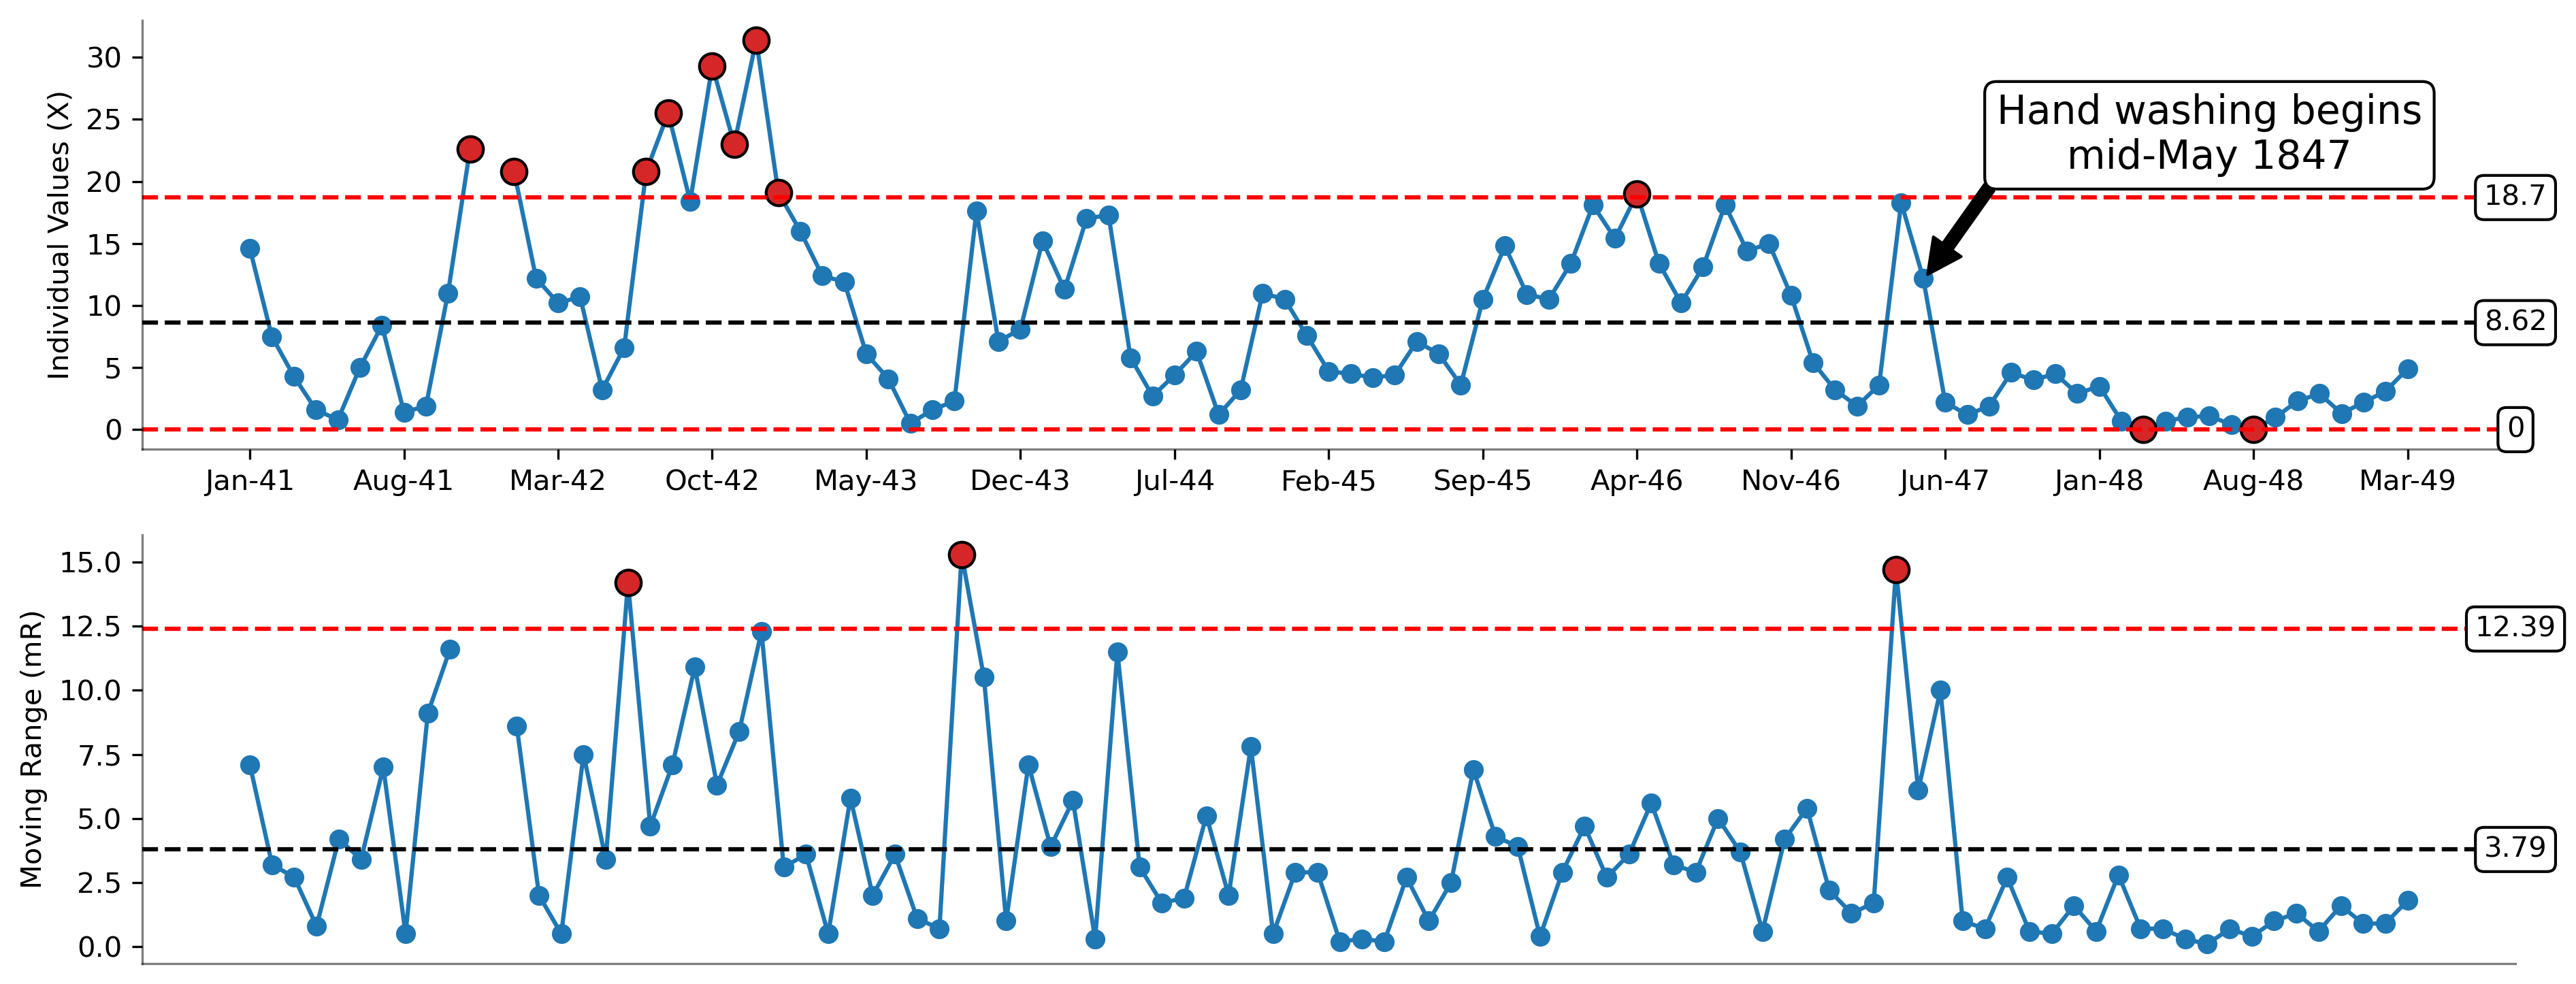

In [14]:
# Round setting
round_value = 2

# Extract Data
data = df['Death-to-Birth Ratio']
labels = df['ShortMonthYear']
moving_ranges = df['Moving Ranges']

# Define Process Limits
xchart_lines = [(mean, 'black'), (UPL, 'red'), (LPL, 'red')]
mrchart_lines = [(average_mR, 'black'), (URL, 'red')]

# Mask values outside limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)

# Setup Figure
fig, axs = plt.subplots(figsize=(15, 6), nrows=2, ncols=1, dpi=300)

# X-Chart (Individuals Chart)
axs[0].plot(labels, data, marker='o', label="Data")
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in xchart_lines:
    axs[0].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
for value, label in [(UPL, UPL), (LPL, LPL), (mean, mean)]:
    axs[0].text(axs[0].get_xlim()[1] * 1.0, value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# X-Axis Formatting
tick_interval = 7
tick_positions = np.arange(0, len(labels), tick_interval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center')

# Moving Range Chart (mR Chart)
axs[1].plot(labels, moving_ranges, marker='o', label="Moving Range")
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add Process Limits
for value, color in mrchart_lines:
    axs[1].axhline(value, ls='--', c=color)

# Add Labels for Process Limits
for value, label in [(URL, URL), (average_mR, average_mR)]:
    axs[1].text(axs[1].get_xlim()[1] * 1.0, value, round(value, round_value),
                color='black', ha='center', va='center', bbox=bbox_props)

# Titles and Labels
axs[0].set_ylabel("Individual Values (X)")
axs[0].set_xlabel("")
axs[0].set_title("")

# Remove xticks on moving range chart
axs[1].set_xticks([])
axs[1].set_ylabel("Moving Range (mR)")

# Remove spines
sns.despine()
# Set alpha values
for val in range(0,2):
    axs[val].spines[['left','bottom']].set_alpha(0.5)

# Add arrow to highlight May-1847
axs[0].annotate('Hand washing begins\nmid-May 1847', 
             xy=(76.2,12.5), 
             xytext=(89,21), 
             color='black', 
             fontsize=14,
             ha='center',
             arrowprops=dict(facecolor='black'),
             bbox=dict(facecolor='white',boxstyle='round',edgecolor='black'))
    
# Show Plot
plt.show()